(Adapted from lab)

## Preliminaries

### Required libraries

In [1]:
library(spdep)
library(maptools)

Loading required package: sp
Loading required package: Matrix
Warning message:
“package ‘maptools’ was built under R version 3.3.2”Checking rgeos availability: TRUE


### Reading shape file and extracting the data

In [2]:
chicago <- readShapePoly("ComArea/ComArea_ACS14_f.shp")

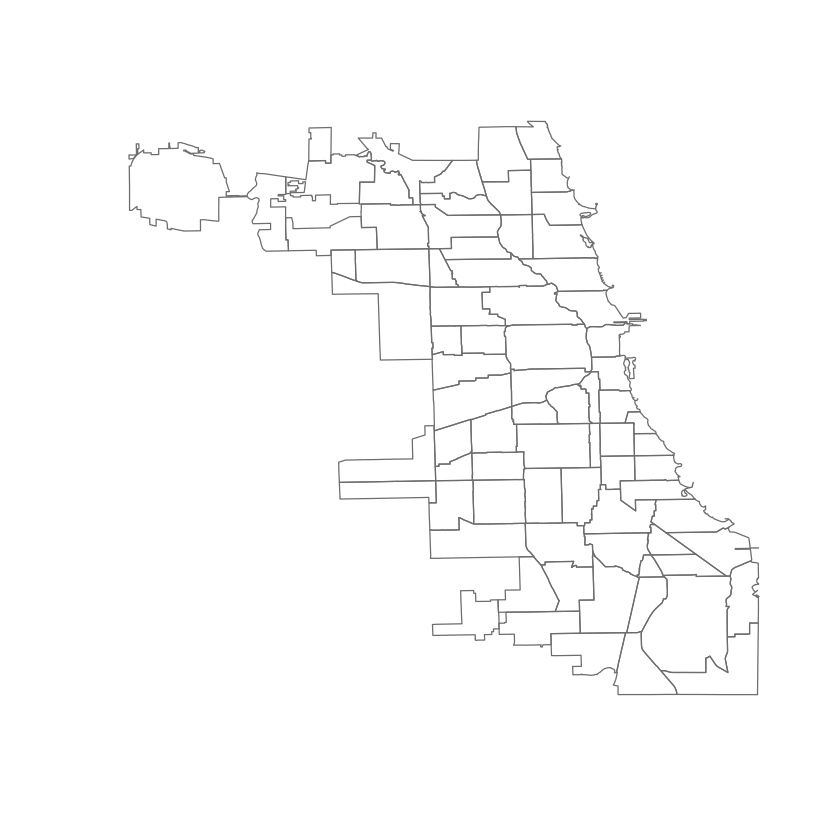

In [4]:
plot(chicago,border=gray(0.5))

In [5]:
vars <- c("PC1","PC2","PC3","PC4", "PC5")
dat <- data.frame(chicago@data[,vars])
summary(dat)

      PC1                 PC2                 PC3               PC4            
 Min.   :-5.578400   Min.   :-3.447700   Min.   :-1.6525   Min.   :-1.4699000  
 1st Qu.:-1.856600   1st Qu.:-1.226800   1st Qu.:-0.4785   1st Qu.:-0.4051000  
 Median : 0.275400   Median : 0.122400   Median : 0.0276   Median :-0.1553000  
 Mean   : 0.000001   Mean   : 0.000004   Mean   : 0.0000   Mean   :-0.0000039  
 3rd Qu.: 1.769900   3rd Qu.: 1.347400   3rd Qu.: 0.3650   3rd Qu.: 0.4160000  
 Max.   : 4.070700   Max.   : 2.711000   Max.   : 4.6273   Max.   : 2.5364000  
      PC5         
 Min.   :-1.1408  
 1st Qu.:-0.3109  
 Median :-0.0265  
 Mean   : 0.0000  
 3rd Qu.: 0.3100  
 Max.   : 1.0720  

In [6]:
sdat <- scale(dat)
summary(sdat)

      PC1               PC2               PC3                PC4         
 Min.   :-2.3877   Min.   :-2.1098   Min.   :-1.89883   Min.   :-2.0044  
 1st Qu.:-0.7947   1st Qu.:-0.7507   1st Qu.:-0.54983   1st Qu.:-0.5524  
 Median : 0.1179   Median : 0.0749   Median : 0.03171   Median :-0.2118  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.7575   3rd Qu.: 0.8245   3rd Qu.: 0.41941   3rd Qu.: 0.5673  
 Max.   : 1.7423   Max.   : 1.6590   Max.   : 5.31707   Max.   : 3.4587  
      PC5          
 Min.   :-2.24037  
 1st Qu.:-0.61056  
 Median :-0.05204  
 Mean   : 0.00000  
 3rd Qu.: 0.60880  
 Max.   : 2.10526  

In [7]:
chicago.nb <- poly2nb(chicago)
summary(chicago.nb)

Neighbour list object:
Number of regions: 77 
Number of nonzero links: 394 
Percentage nonzero weights: 6.645303 
Average number of links: 5.116883 
Link number distribution:

 1  2  3  4  5  6  7  8  9 
 1  3  8 19 13 16 11  5  1 
1 least connected region:
76 with 1 link
1 most connected region:
69 with 9 links


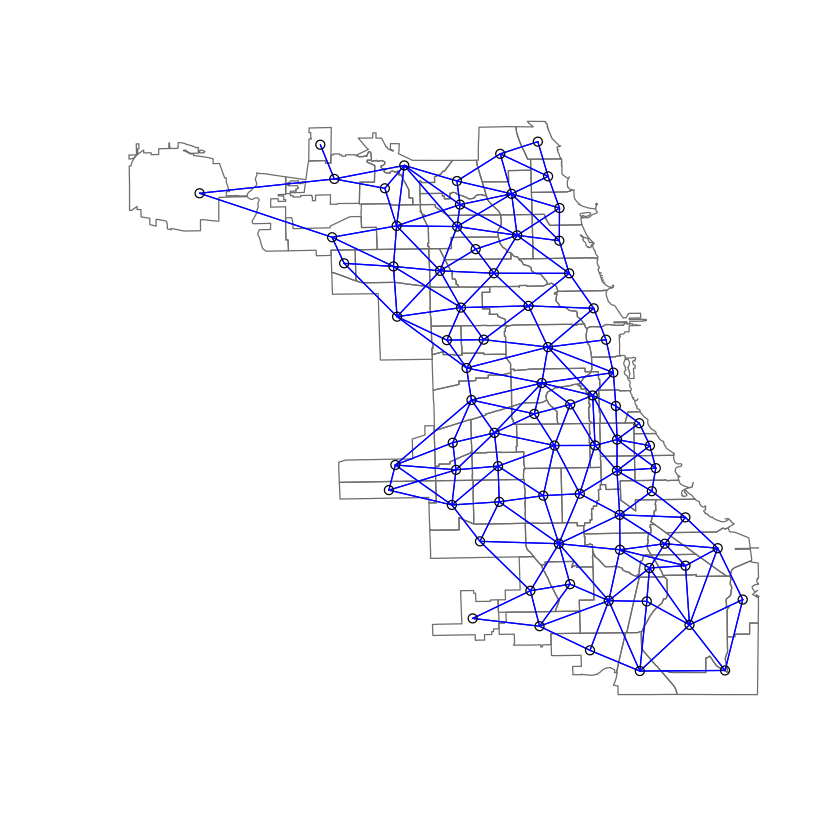

In [8]:
plot(chicago,border=gray(.5))
plot(chicago.nb,coordinates(chicago),col="blue",add=TRUE)

In [9]:
lcosts <- nbcosts(chicago.nb,sdat)
head(lcosts)

[[1]]
[1] 3.509750 1.973240 3.519889 4.310358

[[2]]
[1] 3.509750 1.631469 2.374478

[[3]]
[1] 5.235607 5.282504 8.258137 4.564739 6.757471 6.639070

[[4]]
[1] 1.973240 1.631469 5.235607 1.747573 1.738509 2.442212 3.264495

[[5]]
[1] 2.374478 1.747573 3.180280 1.426797

[[6]]
[1] 3.0231914 1.9032171 1.6058360 2.2558145 1.6567390 1.9099791 0.9340141
[8] 2.2347196

In [10]:
chicago.w <- nb2listw(chicago.nb,lcosts,style="B")
summary(chicago.w)

Characteristics of weights list object:
Neighbour list object:
Number of regions: 77 
Number of nonzero links: 394 
Percentage nonzero weights: 6.645303 
Average number of links: 5.116883 
Link number distribution:

 1  2  3  4  5  6  7  8  9 
 1  3  8 19 13 16 11  5  1 
1 least connected region:
76 with 1 link
1 most connected region:
69 with 9 links

Weights style: B 
Weights constants summary:
   n   nn       S0       S1       S2
B 77 5929 885.5057 5048.024 51704.23


In [11]:
chicago.mst <- mstree(chicago.w)
class(chicago.mst)

[1] "mst"    "matrix"

In [12]:
dim(chicago.mst)

[1] 76  3

In [13]:
head(chicago.mst)

12,36,1.056862
36,77,1.069570
36,11,1.295925
36,75,1.344433
11,15,1.447113
15,14,0.619037


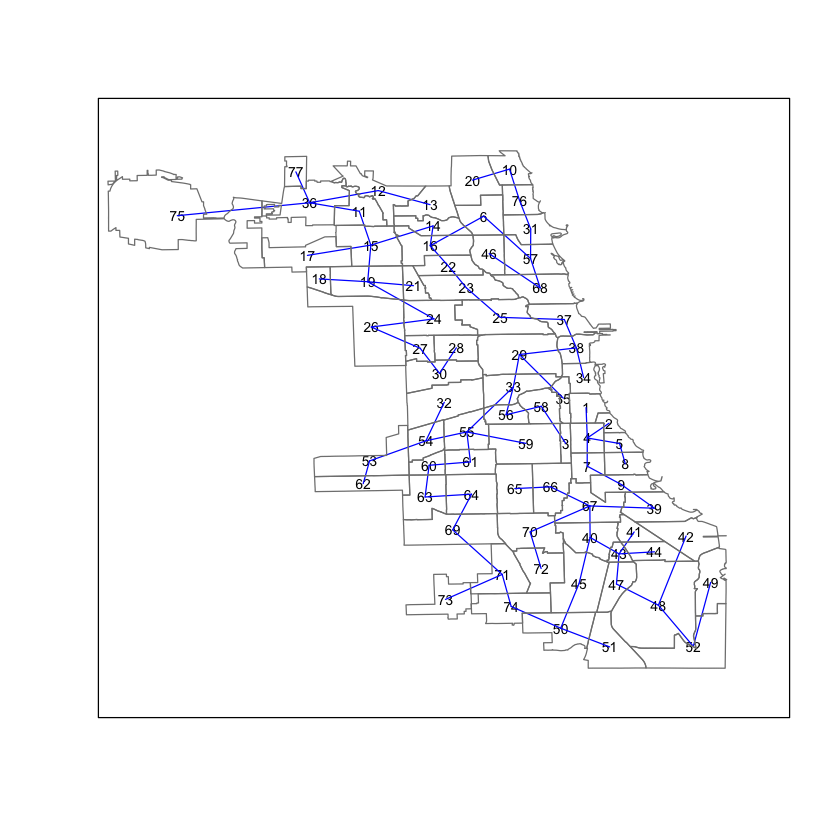

In [14]:
plot(chicago.mst,coordinates(chicago),col="blue",
      cex.lab=0.7)
plot(chicago,border=gray(.5),add=TRUE)

### k = 4

In [15]:
clus4 <- skater(chicago.mst[,1:2],sdat,3)
str(clus4)

List of 8
 $ groups      : num [1:77] 2 2 3 2 2 1 2 2 2 1 ...
 $ edges.groups:List of 4
  ..$ :List of 3
  .. ..$ node: num [1:26] 15 36 11 14 16 22 23 25 12 29 ...
  .. ..$ edge: num [1:25, 1:3] 11 36 14 15 16 22 23 25 12 29 ...
  .. ..$ ssw : num 39.2
  ..$ :List of 3
  .. ..$ node: num [1:30] 71 64 69 74 50 45 40 67 39 9 ...
  .. ..$ edge: num [1:29, 1:3] 50 67 9 74 39 71 48 7 71 50 ...
  .. ..$ ssw : num 57.4
  ..$ :List of 3
  .. ..$ node: num [1:13] 58 33 55 56 61 60 54 53 3 63 ...
  .. ..$ edge: num [1:12, 1:3] 58 56 33 61 55 55 33 60 54 54 ...
  .. ..$ ssw : num 22.3
  ..$ :List of 3
  .. ..$ node: num [1:8] 19 24 26 27 30 28 21 18
  .. ..$ edge: num [1:7, 1:3] 24 26 19 27 30 19 19 26 27 24 ...
  .. ..$ ssw : num 13.3
 $ not.prune   : NULL
 $ candidates  : int [1:4] 1 2 3 4
 $ ssto        : num 160
 $ ssw         : num [1:4] 160 147 140 132
 $ crit        : num [1:2] 1 Inf
 $ vec.crit    : num [1:77] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "class")= chr "skater"


In [16]:
ccs4 <- clus4$groups
ccs4

[1] 2 2 3 2 2 1 2 2 2 1 1 1 1 1 1 1 1 4 4 1 4 1 1 4 1 4 4 4 1 4 1 3 3 1 1 1 1 1
[39] 2 2 2 2 2 2 2 1 2 2 2 2 2 2 3 3 3 3 1 3 3 3 3 3 3 2 2 2 2 1 2 2 2 2 2 2 1 1
[77] 1

In [17]:
table(ccs4)

ccs4
 1  2  3  4 
26 30 13  8 

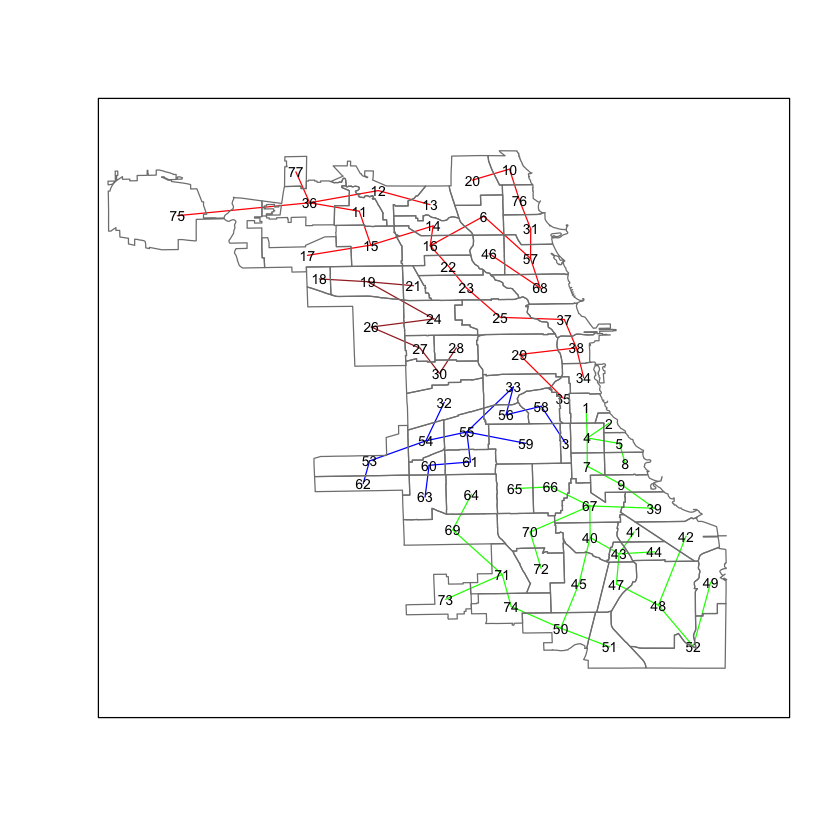

In [18]:
plot(clus4,coordinates(chicago),cex.lab=.7,
    groups.colors=c("red","green","blue","brown"))
plot(chicago,border=gray(.5),add=TRUE)

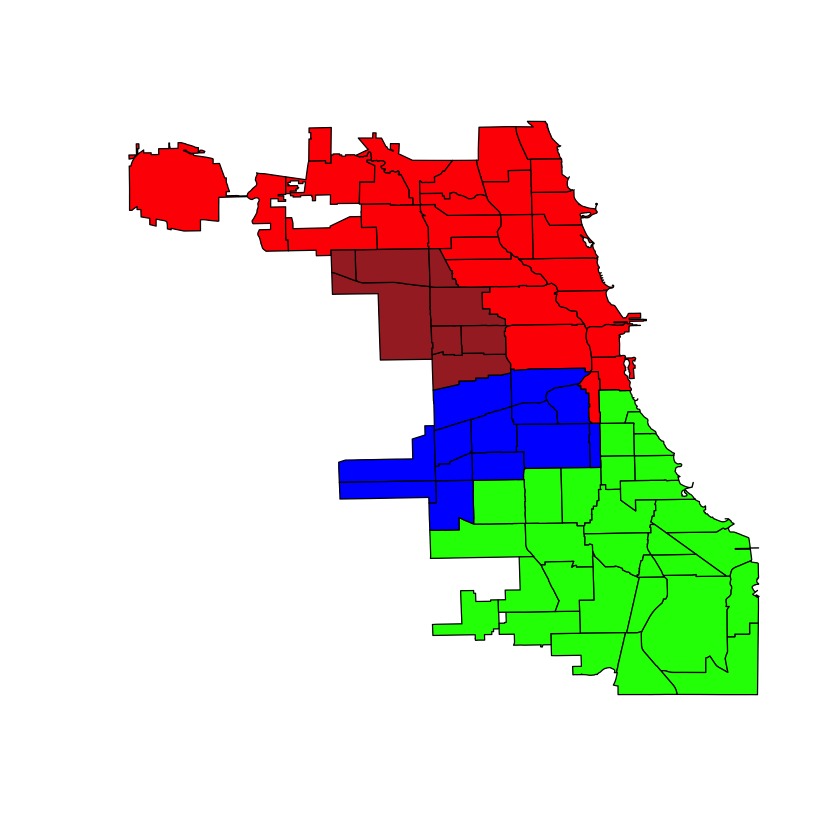

In [19]:
plot(chicago,col=c("red","green","blue","brown")[clus4$groups])

### k = 6

In [20]:
clus6 <- skater(chicago.mst[,1:2],sdat,5)
ccs6 <- clus6$groups
ccs6

[1] 2 2 5 2 2 6 2 2 2 6 1 1 1 6 6 6 6 4 4 6 4 6 6 4 6 4 4 4 6 4 6 3 3 6 6 1 6 6
[39] 2 2 2 2 2 2 2 6 2 2 2 2 2 2 3 3 3 3 6 3 3 3 3 3 3 2 2 2 2 6 2 2 2 2 2 2 1 6
[77] 1

In [21]:
table(ccs6)

ccs6
 1  2  3  4  5  6 
 6 30 12  8  1 20 

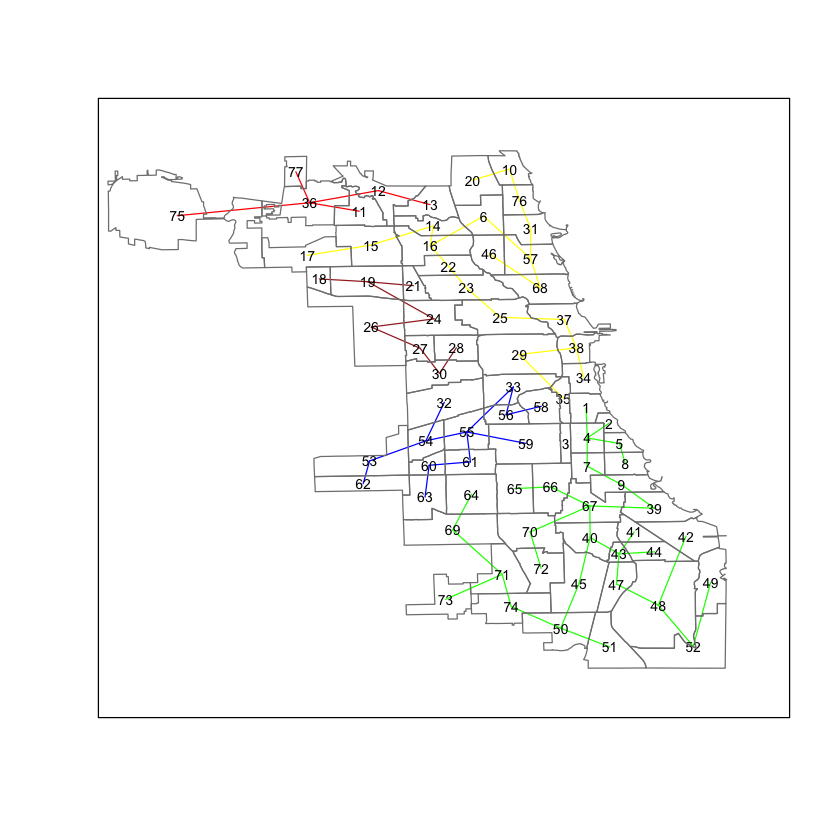

In [22]:
plot(clus6,coordinates(chicago),cex.lab=.7,
    groups.colors=c("red","green","blue","brown","gray","yellow"))
plot(chicago,border=gray(.5),add=TRUE)

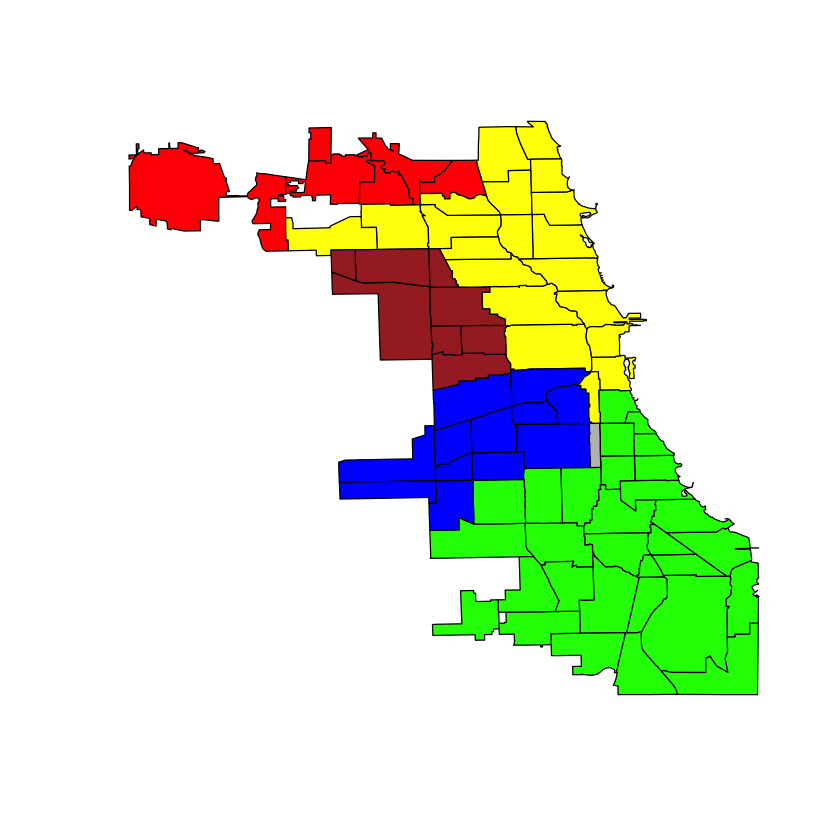

In [23]:
plot(chicago,col=c("red","green","blue","brown","gray","yellow")[clus6$groups])

In [25]:
ccsdat <- as.data.frame(cbind(ccs4,ccs6))
ccsdat$IDCCS <- chicago$ComAreaID
write.csv(ccsdat,"contconstclus.csv",row.names=FALSE)